# Speech Phoneme Analysis and Classification 
## Importing dataset

In [263]:
import pandas as pd

df = pd.read_csv('Formant Frequencies - NLP - Sheet1.csv')

print(df.head())

  Speaker Laber Gender  Word Vowel Phoneme  Class Label  Formant 1  Formant 2  \
0        alw001      F  hood            UH            1     524.21    1059.08   
1        alw001      F   hid            IH            2     455.42    2563.73   
2        alw001      F   had            AE            3    1009.08    1707.87   
3        cxb001      F  hood            UH            1     527.77     954.96   
4        cxb001      F   hid            IH            2     362.49    2756.69   

   Formant 3  
0    3130.83  
1    3190.62  
2    2704.19  
3    2817.49  
4    3183.99  


## Dataset preprocessing

In [264]:
# keeping only the needed columns
df = df[['Gender', 'Vowel Phoneme', 'Formant 1', 'Formant 2', 'Formant 3']]
print(df.head())

  Gender Vowel Phoneme  Formant 1  Formant 2  Formant 3
0      F            UH     524.21    1059.08    3130.83
1      F            IH     455.42    2563.73    3190.62
2      F            AE    1009.08    1707.87    2704.19
3      F            UH     527.77     954.96    2817.49
4      F            IH     362.49    2756.69    3183.99


## Imports and knn instance

In [265]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

results = []
knn = KNeighborsClassifier(n_neighbors=5)

## kNN Classifier: 
### Experimenting with Split 

---------------------------------
For split =  0.05 

Accuracy: 0.88
F1 Score (macro average): 0.84
F1 Score (weighted average): 0.86


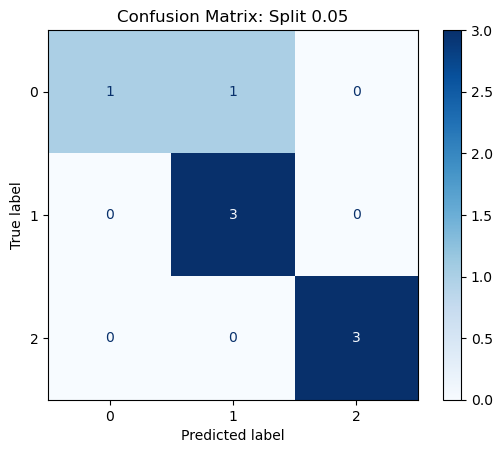

---------------------------------
For split =  0.1 

Accuracy: 0.93
F1 Score (macro average): 0.93
F1 Score (weighted average): 0.93


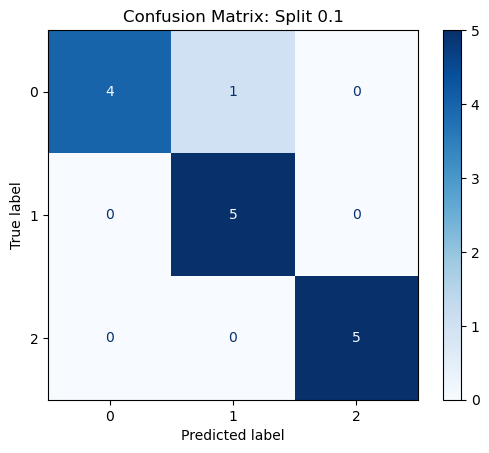

---------------------------------
For split =  0.15 

Accuracy: 0.87
F1 Score (macro average): 0.87
F1 Score (weighted average): 0.87


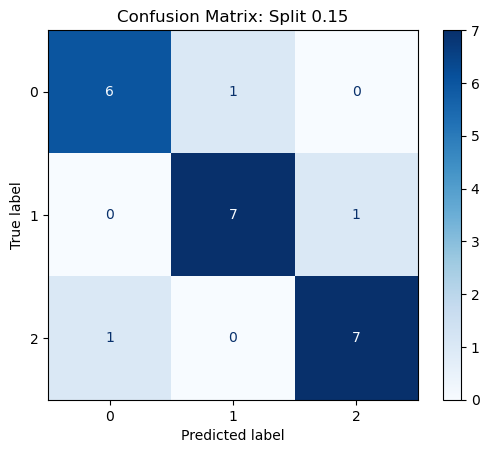

---------------------------------
For split =  0.2 

Accuracy: 0.87
F1 Score (macro average): 0.87
F1 Score (weighted average): 0.87


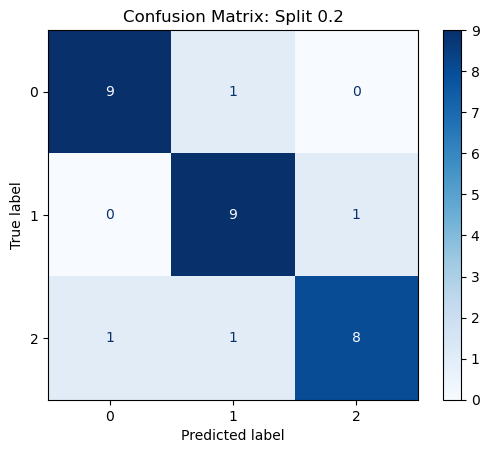

---------------------------------
For split =  0.25 

Accuracy: 0.79
F1 Score (macro average): 0.79
F1 Score (weighted average): 0.79


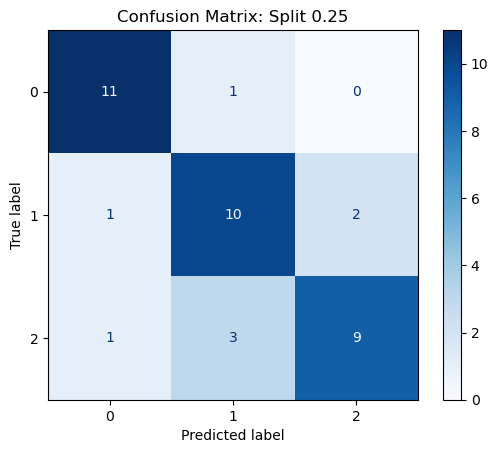

In [266]:
Y = df['Vowel Phoneme'].values
X = df[['Formant 1', 'Formant 2', 'Formant 3']].values

for split in [0.05, 0.1, 0.15, 0.2, 0.25]:
    print('---------------------------------')
    print('For split = ', split, '\n')
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=split, random_state=42, stratify=Y)
    
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    acc = round(accuracy_score(y_test, y_pred), 2)
    print(f"Accuracy: {acc}")
    f1m = round(f1_score(y_test, y_pred, average='macro'), 2)
    print(f"F1 Score (macro average): {f1m:.2f}")
    f1w = round(f1_score(y_test, y_pred, average='weighted'), 2)
    print(f"F1 Score (weighted average): {f1w:.2f}")
    cm= confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix: Split {split}")
    plt.show()
    results.append({'Split':split, 'Accuracy':acc, 'F1-Weighted':f1w, 'F1-Macro': f1m})

### Visualizing Results

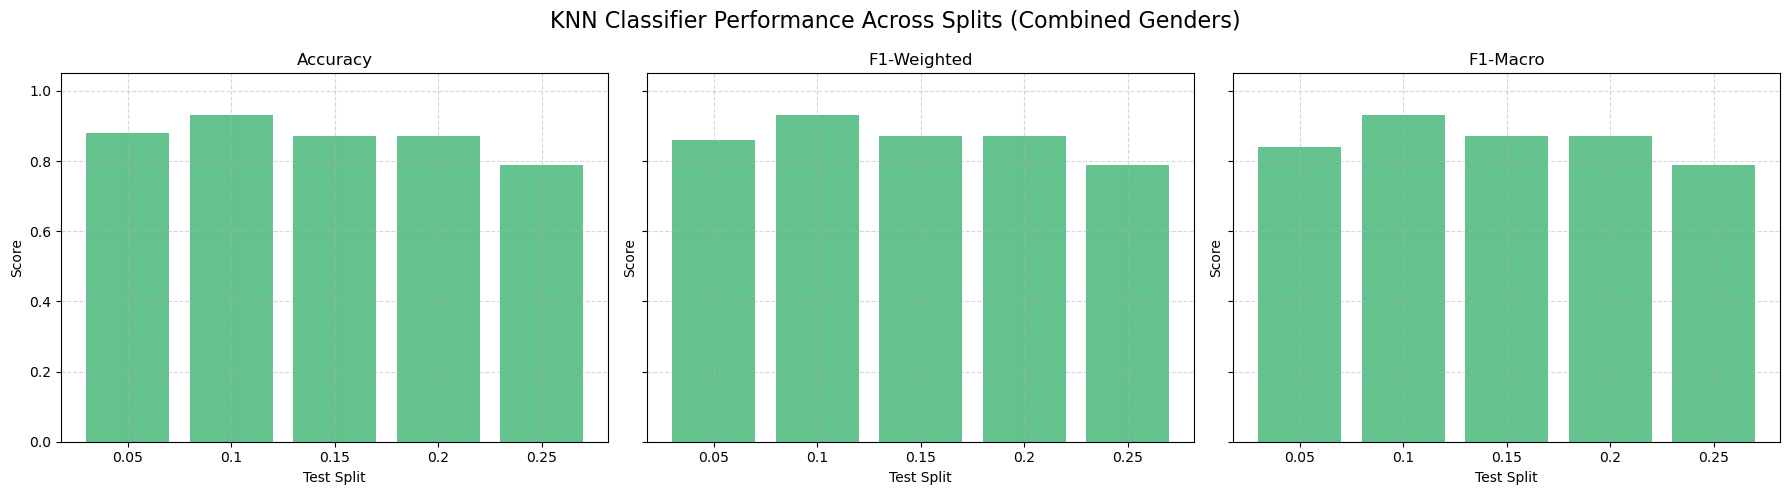

In [267]:
import pandas as pd
import matplotlib.pyplot as plt

# convert results list to DataFrame
df_results = pd.DataFrame(results)

# plotting performance metrics for different splits
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
metrics = ['Accuracy', 'F1-Weighted', 'F1-Macro']

for i, metric in enumerate(metrics):
    ax = axs[i]
    ax.bar(df_results['Split'].astype(str), df_results[metric], color='mediumseagreen', alpha=0.8)
    ax.set_title(metric)
    ax.set_xlabel('Test Split')
    ax.set_ylabel('Score')
    ax.set_ylim(0, 1.05)
    ax.grid(True, linestyle='--', alpha=0.5)

plt.suptitle('KNN Classifier Performance Across Splits (Combined Genders)', fontsize=16)
plt.tight_layout()
plt.show()


## kNN Classifier: 
### Experimenting with K values

---------------------------------
K = 2 | Split = 0.2

Accuracy: 0.83
F1 Score (macro average): 0.82
F1 Score (weighted average): 0.82


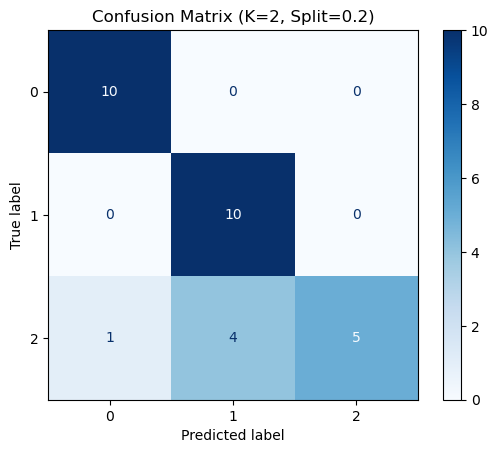

---------------------------------
K = 3 | Split = 0.2

Accuracy: 0.87
F1 Score (macro average): 0.87
F1 Score (weighted average): 0.87


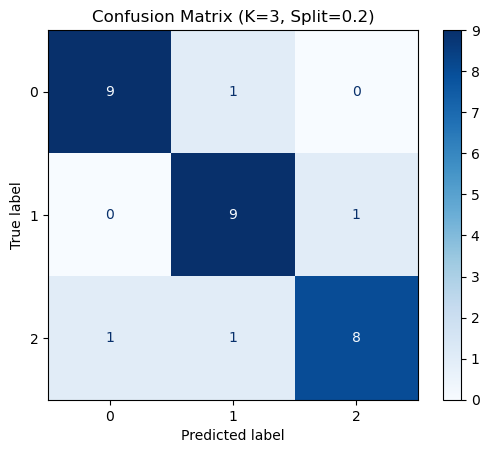

---------------------------------
K = 4 | Split = 0.2

Accuracy: 0.87
F1 Score (macro average): 0.87
F1 Score (weighted average): 0.87


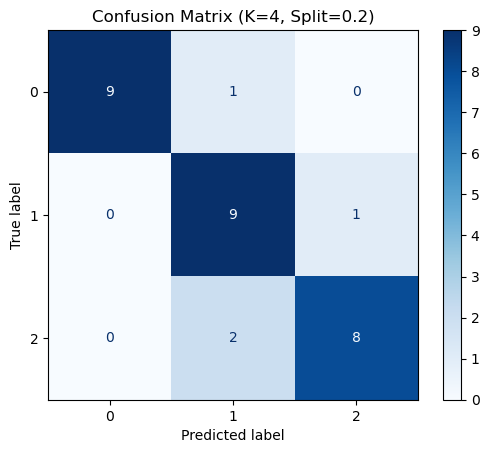

---------------------------------
K = 5 | Split = 0.2

Accuracy: 0.87
F1 Score (macro average): 0.87
F1 Score (weighted average): 0.87


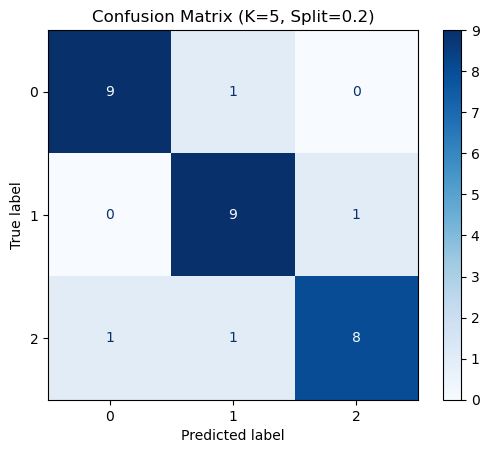

---------------------------------
K = 6 | Split = 0.2

Accuracy: 0.8
F1 Score (macro average): 0.8
F1 Score (weighted average): 0.8


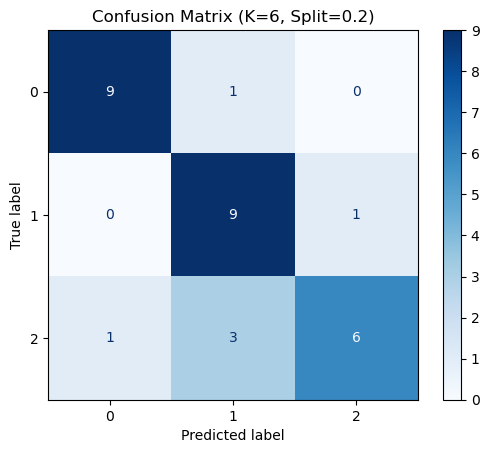

---------------------------------
K = 7 | Split = 0.2

Accuracy: 0.83
F1 Score (macro average): 0.84
F1 Score (weighted average): 0.84


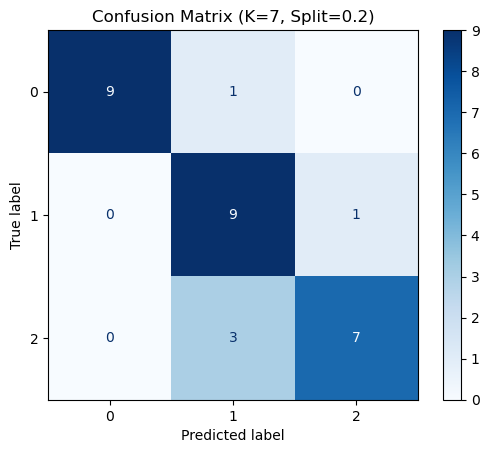

---------------------------------
K = 10 | Split = 0.2

Accuracy: 0.87
F1 Score (macro average): 0.87
F1 Score (weighted average): 0.87


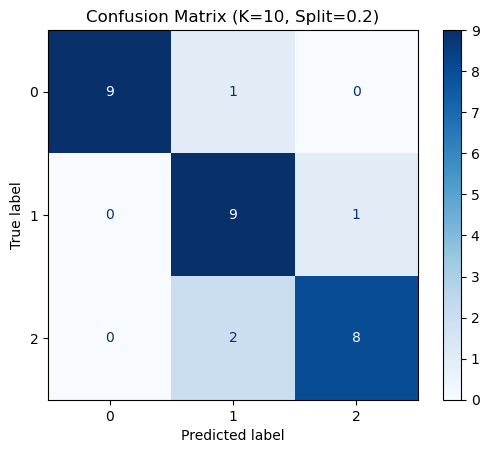

In [268]:
results = []
split = 0.2

Y = df['Vowel Phoneme'].values
X = df[['Formant 1', 'Formant 2', 'Formant 3']].values

for k in [2, 3, 4, 5, 6, 7, 10]:
    knn = KNeighborsClassifier(n_neighbors=k)

    print('---------------------------------')
    print(f'K = {k} | Split = {split}\n')

    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=split, random_state=42, stratify=Y
    )

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc = round(accuracy_score(y_test, y_pred), 2)
    f1m = round(f1_score(y_test, y_pred, average='macro'), 2)
    f1w = round(f1_score(y_test, y_pred, average='weighted'), 2)

    print(f"Accuracy: {acc}")
    print(f"F1 Score (macro average): {f1m}")
    print(f"F1 Score (weighted average): {f1w}")

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix (K={k}, Split={split})")
    plt.show()

    results.append({
        'Split': split,
        'Accuracy': acc,
        'F1-Weighted': f1w,
        'F1-Macro': f1m,
        'K': k
    })

### Visualizing Results

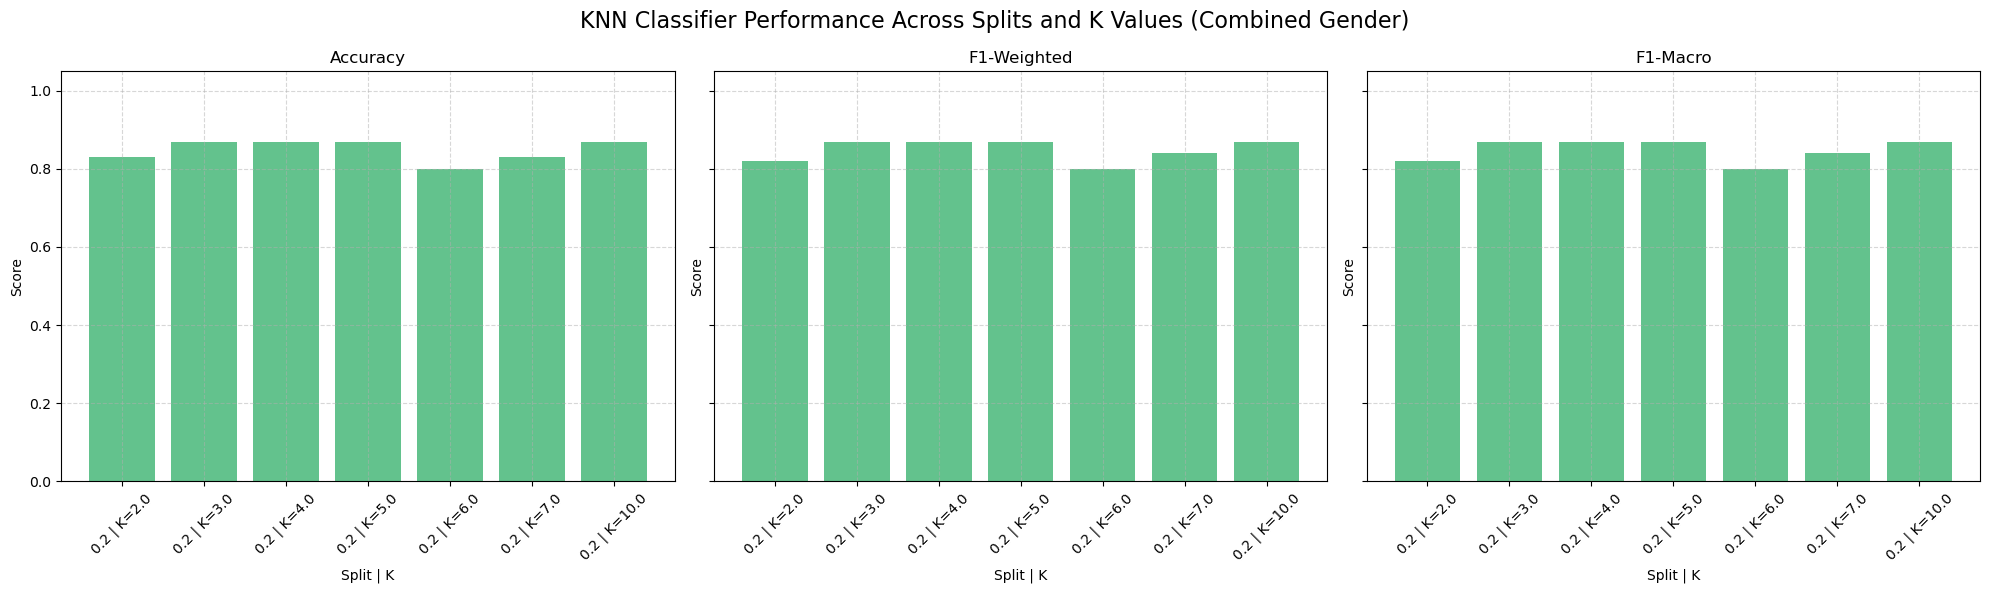

In [269]:
import pandas as pd
import matplotlib.pyplot as plt

# convert to DataFrame
df_results = pd.DataFrame(results)

# plot
fig, axs = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

metrics = ['Accuracy', 'F1-Weighted', 'F1-Macro']
x_labels = [f"{row['Split']} | K={row['K']}" for _, row in df_results.iterrows()]
bar_color = 'mediumseagreen'

for i, metric in enumerate(metrics):
    ax = axs[i]
    ax.bar(x_labels, df_results[metric], color=bar_color, alpha=0.8)
    ax.set_title(metric)
    ax.set_xlabel('Split | K')
    ax.set_ylabel('Score')
    ax.set_ylim(0, 1.05)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.5)

plt.suptitle('KNN Classifier Performance Across Splits and K Values (Combined Gender)', fontsize=16)
plt.tight_layout()
plt.show()


## kNN Classifier:
### Experimenting with Distance Metrics

---------------------------------
K = 3 | Split = 0.2 | Metric = euclidean

Accuracy: 0.87
F1 Score (macro average): 0.87
F1 Score (weighted average): 0.87


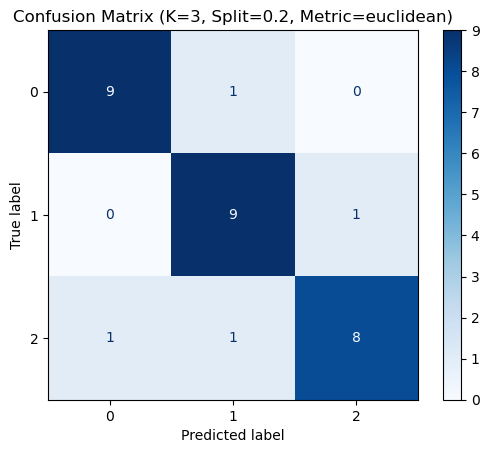

---------------------------------
K = 3 | Split = 0.2 | Metric = manhattan

Accuracy: 0.87
F1 Score (macro average): 0.87
F1 Score (weighted average): 0.87


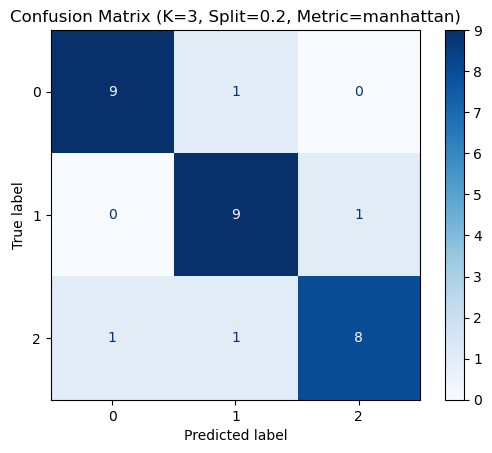

---------------------------------
K = 3 | Split = 0.2 | Metric = minkowski

Accuracy: 0.87
F1 Score (macro average): 0.87
F1 Score (weighted average): 0.87


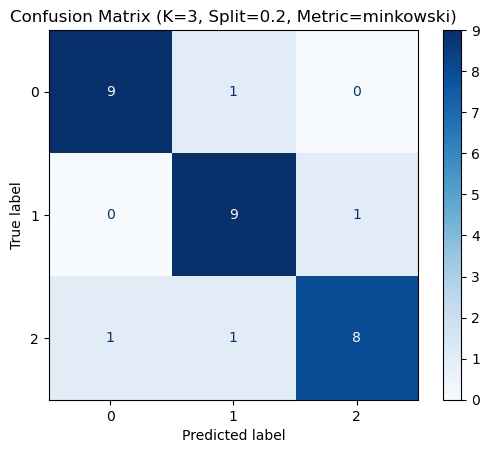

---------------------------------
K = 3 | Split = 0.2 | Metric = hamming

Accuracy: 0.33
F1 Score (macro average): 0.17
F1 Score (weighted average): 0.17


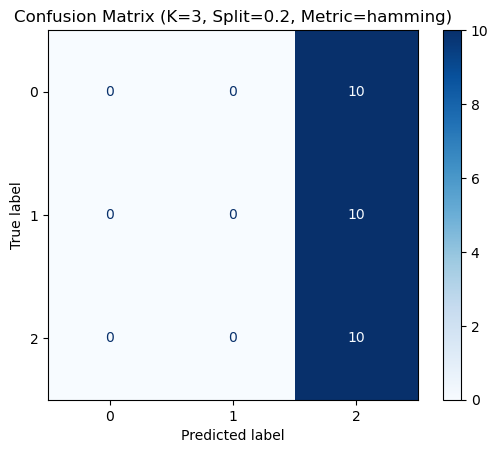

In [270]:
results = []
split = 0.2
k = 3

Y = df['Vowel Phoneme'].values
X = df[['Formant 1', 'Formant 2', 'Formant 3']].values

for metric in ['euclidean', 'manhattan', 'minkowski', 'hamming']:
    print('---------------------------------')
    print(f'K = {k} | Split = {split} | Metric = {metric}\n')

    # initialize classifier
    knn = KNeighborsClassifier(n_neighbors=k, metric=metric)

    # split
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=split, random_state=42, stratify=Y
    )

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc = round(accuracy_score(y_test, y_pred), 2)
    f1m = round(f1_score(y_test, y_pred, average='macro'), 2)
    f1w = round(f1_score(y_test, y_pred, average='weighted'), 2)

    print(f"Accuracy: {acc}")
    print(f"F1 Score (macro average): {f1m}")
    print(f"F1 Score (weighted average): {f1w}")

    # plot
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix (K={k}, Split={split}, Metric={metric})")
    plt.show()

    results.append({
        'Split': split,
        'Accuracy': acc,
        'F1-Weighted': f1w,
        'F1-Macro': f1m,
        'K': k,
        'Metric': metric
    })

### Visualizing Results

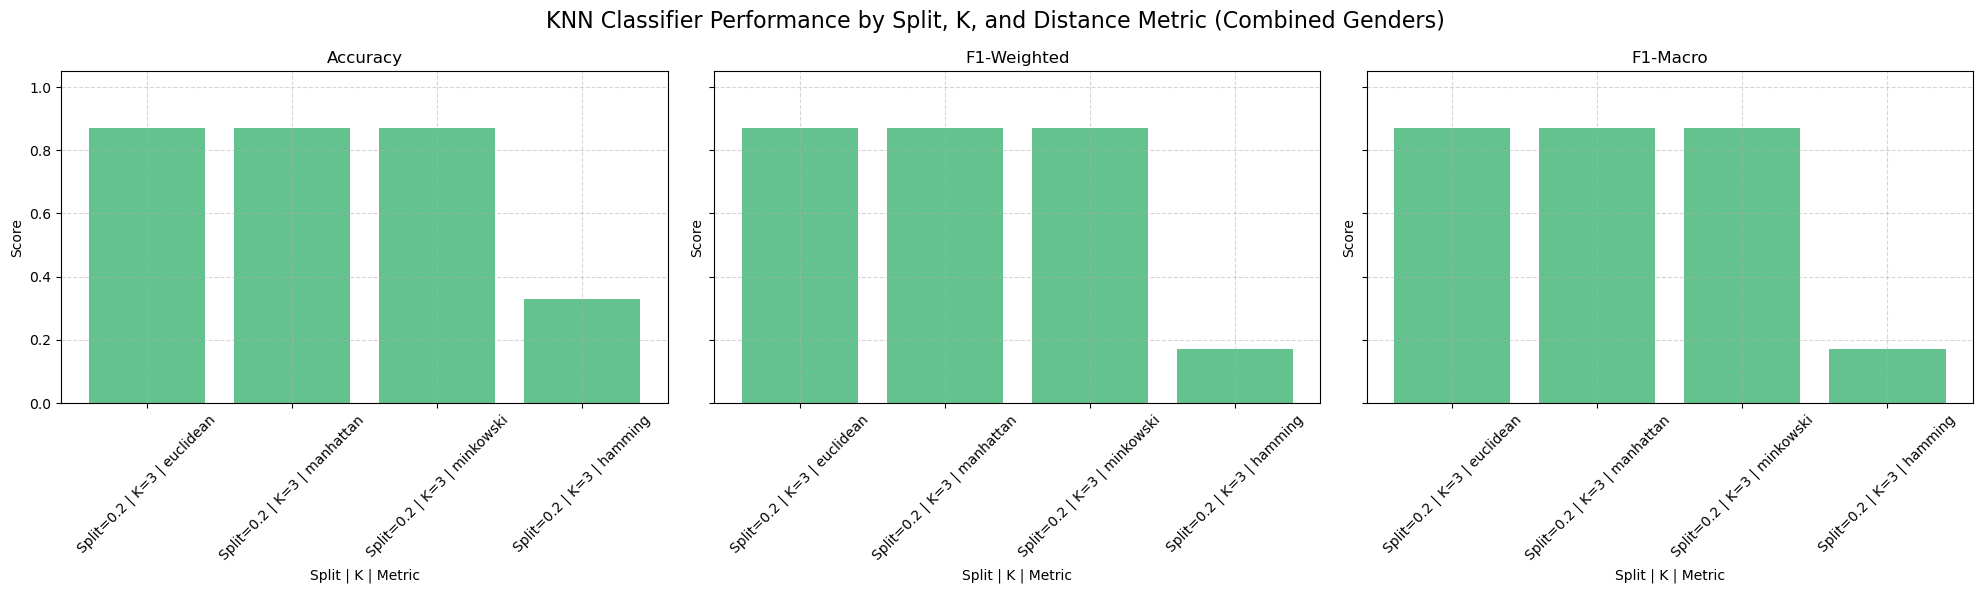

In [271]:
df_plot = pd.DataFrame(results)

fig, axs = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

metrics = ['Accuracy', 'F1-Weighted', 'F1-Macro']

x_labels = [f"Split={row['Split']} | K={row['K']} | {row['Metric']}" for _, row in df_plot.iterrows()]

for i, metric in enumerate(metrics):
    ax = axs[i]
    ax.bar(
        x_labels,
        df_plot[metric],
        color='mediumseagreen',
        alpha=0.8
    )
    ax.set_title(metric)
    ax.set_xlabel('Split | K | Metric')
    ax.set_ylabel('Score')
    ax.set_ylim(0, 1.05)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.5)

plt.suptitle('KNN Classifier Performance by Split, K, and Distance Metric (Combined Genders)', fontsize=16)
plt.tight_layout()
plt.show()


## kNN Classifier: Both Genders combined
### Experimenting with combining both genders

In [272]:
df = pd.read_csv('Formant Frequencies - NLP - Sheet1.csv')
df = df[['Gender', 'Vowel Phoneme', 'Formant 1', 'Formant 2', 'Formant 3']]

---------------------------------
Accuracy: 0.87
F1 Score (macro average): 0.87
F1 Score (weighted average): 0.87


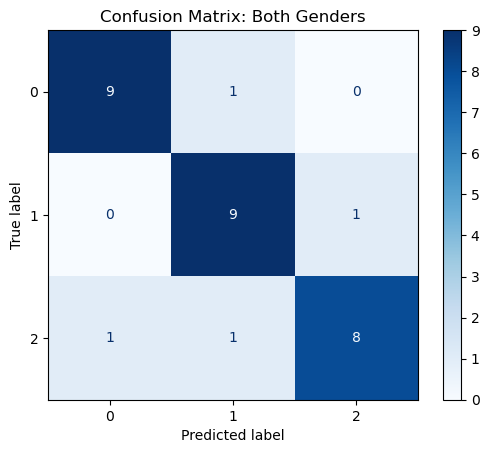

In [273]:
results = []
split = 0.2 
k = 3
metric = 'euclidean'

knn = KNeighborsClassifier(n_neighbors=k, metric=metric)

Y = df['Vowel Phoneme'].values
X = df[['Formant 1', 'Formant 2', 'Formant 3']].values

print('---------------------------------')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=split, random_state=42, stratify=Y)
    
knn.fit(X_train, y_train)
    
y_pred = knn.predict(X_test)
    
acc = round(accuracy_score(y_test, y_pred), 2)
print(f"Accuracy: {acc}")
f1m = round(f1_score(y_test, y_pred, average='macro'), 2)
print(f"F1 Score (macro average): {f1m:.2f}")
f1w = round(f1_score(y_test, y_pred, average='weighted'), 2)
print(f"F1 Score (weighted average): {f1w:.2f}")
cm= confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Both Genders")
plt.show()

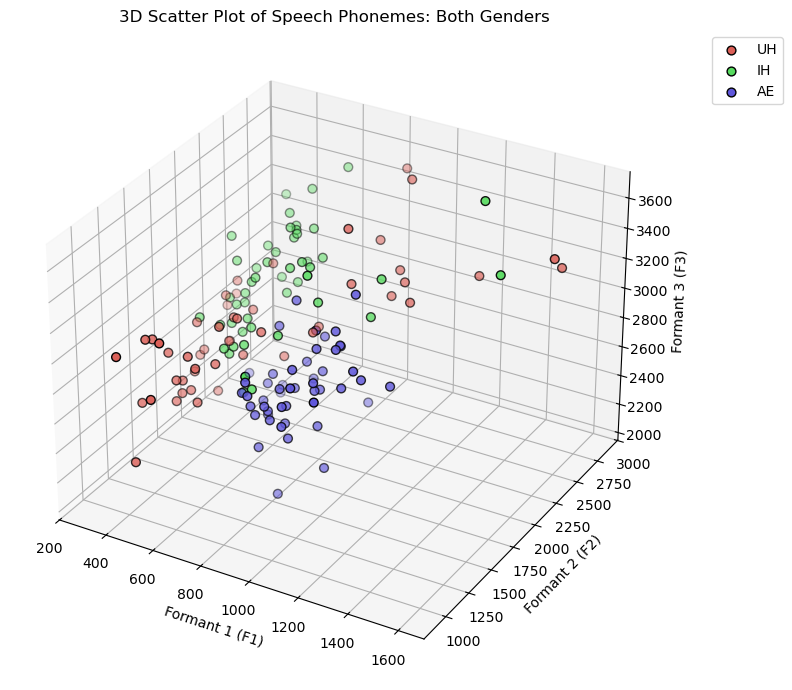

In [274]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x = df['Formant 1']
y = df['Formant 2']
z = df['Formant 3']
labels = df['Vowel Phoneme']

unique_phonemes = labels.unique()
colors = sns.color_palette('hls', len(unique_phonemes))
phoneme_to_color = dict(zip(unique_phonemes, colors))

for phoneme in unique_phonemes:
    indices = labels == phoneme
    ax.scatter(
        x[indices], y[indices], z[indices],
        label=phoneme,
        color=phoneme_to_color[phoneme],
        s=40, edgecolor='k'
    )

ax.set_xlabel('Formant 1 (F1)')
ax.set_ylabel('Formant 2 (F2)')
ax.set_zlabel('Formant 3 (F3)')
ax.set_title('3D Scatter Plot of Speech Phonemes: Both Genders')
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.tight_layout()
plt.show()
results.append({
            'Split': split,
            'Accuracy': acc,
            'F1-Weighted': f1w,
            'F1-Macro': f1m,
            'K': k,
            'Metric': metric
})

## kNN Classifier: Male 
### Experimenting with seperating genders

---------------------------------
Accuracy: 0.87
F1 Score (macro average): 0.86
F1 Score (weighted average): 0.86


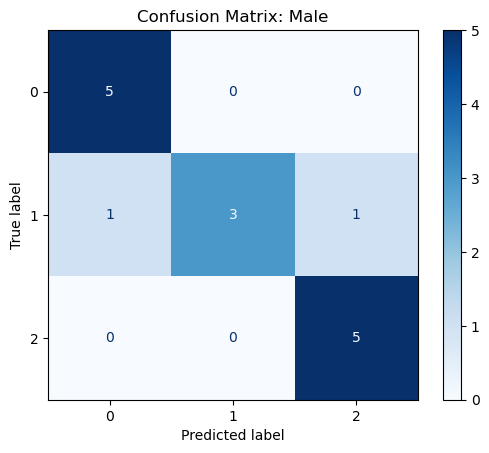

In [275]:
results = []
split = 0.2
k = 3
metric = 'euclidean'

male_df = df[df['Gender'] == 'M']
knn = KNeighborsClassifier(n_neighbors=k, metric=metric)

Y = male_df['Vowel Phoneme'].values
X = male_df[['Formant 1', 'Formant 2', 'Formant 3']].values

print('---------------------------------')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=split, random_state=42, stratify=Y)
    
knn.fit(X_train, y_train)
    
y_pred = knn.predict(X_test)
    
acc = round(accuracy_score(y_test, y_pred), 2)
print(f"Accuracy: {acc}")
f1m = round(f1_score(y_test, y_pred, average='macro'), 2)
print(f"F1 Score (macro average): {f1m:.2f}")
f1w = round(f1_score(y_test, y_pred, average='weighted'), 2)
print(f"F1 Score (weighted average): {f1w:.2f}")
cm= confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Male")
plt.show()
results.append({
            'Gender': 'M',
            'Split': split,
            'Accuracy': acc,
            'F1-Weighted': f1w,
            'F1-Macro': f1m,
            'K': k,
            'Metric': metric
})

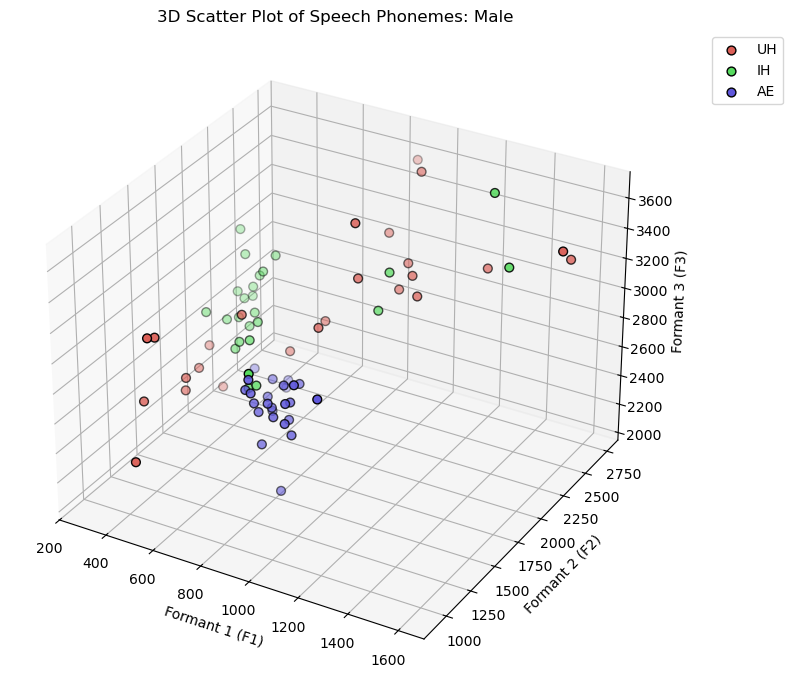

In [276]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x = male_df['Formant 1']
y = male_df['Formant 2']
z = male_df['Formant 3']
labels = male_df['Vowel Phoneme']

unique_phonemes = labels.unique()
colors = sns.color_palette('hls', len(unique_phonemes))
phoneme_to_color = dict(zip(unique_phonemes, colors))

for phoneme in unique_phonemes:
    indices = labels == phoneme
    ax.scatter(
        x[indices], y[indices], z[indices],
        label=phoneme,
        color=phoneme_to_color[phoneme],
        s=40, edgecolor='k'
    )

ax.set_xlabel('Formant 1 (F1)')
ax.set_ylabel('Formant 2 (F2)')
ax.set_zlabel('Formant 3 (F3)')
ax.set_title('3D Scatter Plot of Speech Phonemes: Male')
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.tight_layout()
plt.show()

---------------------------------
Accuracy: 0.87
F1 Score (macro average): 0.87
F1 Score (weighted average): 0.87


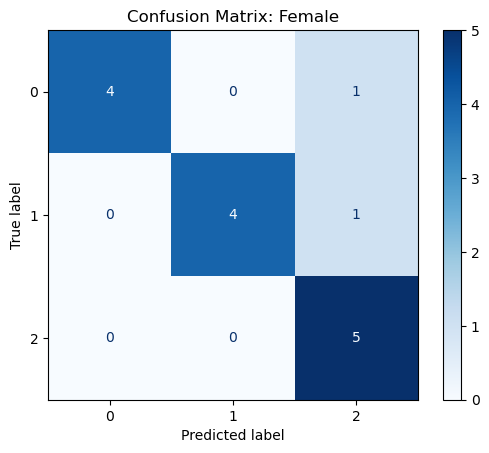

In [277]:
split = 0.2
k = 3
metric = 'euclidean'

female_df = df[df['Gender'] == 'F']
knn = KNeighborsClassifier(n_neighbors=k, metric=metric)

Y = female_df['Vowel Phoneme'].values
X = female_df[['Formant 1', 'Formant 2', 'Formant 3']].values

print('---------------------------------')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=split, random_state=42, stratify=Y)
    
knn.fit(X_train, y_train)
    
y_pred = knn.predict(X_test)
    
acc = round(accuracy_score(y_test, y_pred), 2)
print(f"Accuracy: {acc}")
f1m = round(f1_score(y_test, y_pred, average='macro'), 2)
print(f"F1 Score (macro average): {f1m:.2f}")
f1w = round(f1_score(y_test, y_pred, average='weighted'), 2)
print(f"F1 Score (weighted average): {f1w:.2f}")
cm= confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Female")
plt.show()
results.append({
            'Gender': 'F',
            'Split': split,
            'Accuracy': acc,
            'F1-Weighted': f1w,
            'F1-Macro': f1m,
            'K': k,
            'Metric': metric
})

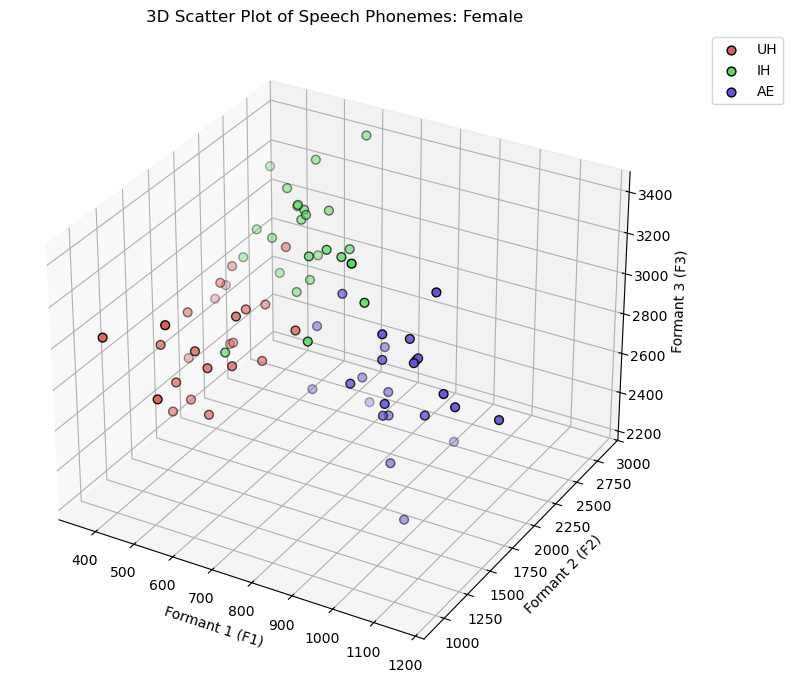

In [278]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x = female_df['Formant 1']
y = female_df['Formant 2']
z = female_df['Formant 3']
labels = female_df['Vowel Phoneme']

unique_phonemes = labels.unique()
colors = sns.color_palette('hls', len(unique_phonemes))
phoneme_to_color = dict(zip(unique_phonemes, colors))

for phoneme in unique_phonemes:
    indices = labels == phoneme
    ax.scatter(
        x[indices], y[indices], z[indices],
        label=phoneme,
        color=phoneme_to_color[phoneme],
        s=40, edgecolor='k'
    )

ax.set_xlabel('Formant 1 (F1)')
ax.set_ylabel('Formant 2 (F2)')
ax.set_zlabel('Formant 3 (F3)')
ax.set_title('3D Scatter Plot of Speech Phonemes: Female')
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.tight_layout()
plt.show()